# Master Proyect Santiago Niño

#### !pip install --upgrade pip
#### !pip install geopandas matplotlib

In [1]:
import geopandas as gpd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import shapely.vectorized
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

None


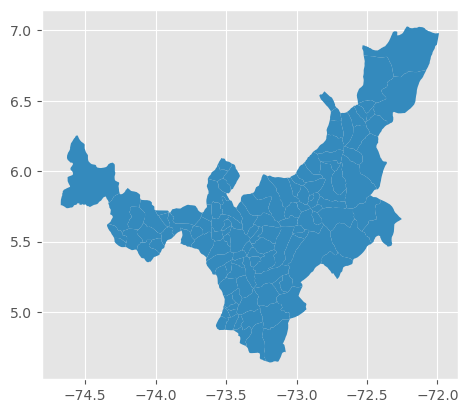

In [2]:
#open point shapefile
pointData = gpd.read_file('shape_boyaca.shp')
print(pointData.crs)
pointData.plot()
epsg:4326

<AxesSubplot:>

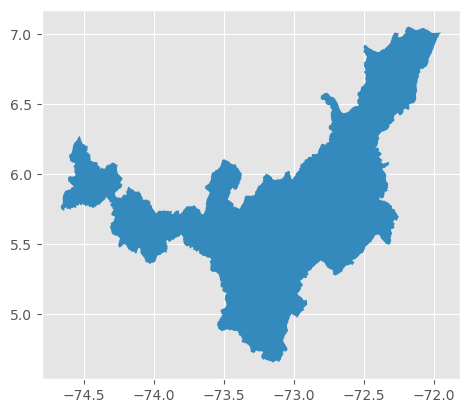

In [3]:
Boyaca2_shp = gpd.read_file('MGN_Departamento.shp')
Boyaca2_shp.plot()

In [6]:
#CARGAR EL DATASET
#-------------------------------------------------------------------------------------
x = np.arange(-74.8, -71.9, 0.05)
y = np.arange(4.5, 7.3, 0.05)
xx, yy = np.meshgrid(x, y)
xnorm = (xx - xx.min()) / (xx.max() - xx.min())
ynorm = (yy - yy.min()) / (yy.max() - yy.min())

# CARGAR DATASET DE CHIRPS
chirps = xr.open_dataset('chirps-v2.0.monthly-nov.nc')

#SELECCIONAR LA VARIABLE DE PRECIPITACION 
pr = chirps['precip']

# sSELECCIONAR LIMITES (xmin, xmax, ymin and ymax) -- TIEMPO Y PERIODO DE INTERES
pr_boyaca = pr.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3),time=slice('1981-01-01','1981-01-01')) #time=slice('1981','2020'))
v = pr_boyaca.to_numpy()

In [7]:
# CONVERTIR DE XARRAY A GEOPANDAS
#-----------------------------------------------------------------------------
df_boyaca = pr_boyaca.to_dataframe().reset_index()
gdf_precip = gpd.GeoDataFrame(df_boyaca.precip, geometry=gpd.points_from_xy(df_boyaca.longitude,df_boyaca.latitude))
gdf_boyaca = gpd.read_file('C://Users//LENOVO//OneDrive - instacrops.com//Documentos//Maestria//proyecto//MGN_Departamento.shp') #crs="epsg:4326"

In [8]:
v = np.squeeze(v) #np 3-D A 2-D

(4.475, 7.27499999999999)

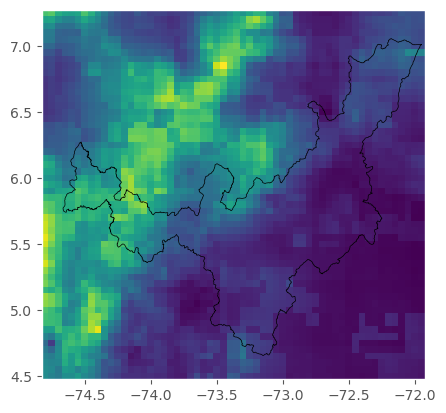

In [9]:
#DELIMITAR EL DEPARTAMENTO DE BOYACA EN COLOR NEGRO
#-----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, v)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

(4.475, 7.27499999999999)

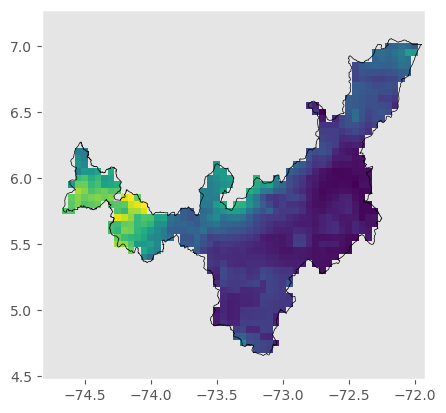

In [10]:
#DELIMITAR EL DEPARTAMENTO DE BOYACA EN COLOR NEGRO Y QUITAR EXCEDENTE DE MAPA PARA 1 MES
#------------------------------------------------------------------------------------------
mask = shapely.vectorized.contains(gdf_boyaca.dissolve().geometry.item(), xx, yy)

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, np.where(mask, v, np.nan))
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [11]:
chirps.info()

xarray.Dataset {
dimensions:
	latitude = 2000 ;
	longitude = 7200 ;
	time = 514 ;

variables:
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:axis = Y ;
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
		longitude:axis = X ;
	float32 precip(time, latitude, longitude) ;
		precip:units = mm/month ;
		precip:standard_name = convective precipitation rate ;
		precip:long_name = Climate Hazards group InfraRed Precipitation with Stations ;
		precip:time_step = month ;
		precip:geostatial_lat_min = -50.0 ;
		precip:geostatial_lat_max = 50.0 ;
		precip:geostatial_lon_min = -180.0 ;
		precip:geostatial_lon_max = 180.0 ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:axis = T ;

// global attributes:
	:Conventions = CF-1.6 ;
	:title = CHIRPS Version 2.0 ;
	:history = created by Climate H

In [12]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
# time: 1981-01-01 a 1981-01-01
# Carga el shapefile
#shp = gpd.read_file(r"C:\Users\LENOVO\OneDrive - instacrops.com\Documentos\Maestria\proyecto\shapes\shape_boyaca.shp") #por municipio
shp = gpd.read_file(r"C:\Users\LENOVO\OneDrive - instacrops.com\Documentos\Maestria\proyecto\MGN_Departamento.shp") #completo

# DataFrame se llama df y tiene dos columnas para la latitud y longitud
df = pr_boyaca.to_dataframe().reset_index()
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

In [13]:
df

,time,latitude,longitude,precip,geometry
0,1981-01-01,4.524998,-74.775002,59.656879,POINT (-74.77500 4.52500)
1,1981-01-01,4.524998,-74.725006,55.540077,POINT (-74.72501 4.52500)
2,1981-01-01,4.524998,-74.675003,51.964622,POINT (-74.67500 4.52500)
3,1981-01-01,4.524998,-74.625008,60.566013,POINT (-74.62501 4.52500)
4,1981-01-01,4.524998,-74.575005,60.152557,POINT (-74.57500 4.52500)
...,...,...,...,...,...
3243,1981-01-01,7.274998,-72.125008,29.612566,POINT (-72.12501 7.27500)
3244,1981-01-01,7.274998,-72.075005,35.305779,POINT (-72.07500 7.27500)
3245,1981-01-01,7.274998,-72.025002,33.326130,POINT (-72.02500 7.27500)
3246,1981-01-01,7.274998,-71.975006,32.250004,POINT (-71.97501 7.27500)


### dataset completo (January 1981 to August 2023)

In [14]:
# convert xarray to geopandas 
pr_boyaca_all = pr.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3),time=slice('1981-01-01','2023-08-31'))
df_all = pr_boyaca_all.to_dataframe().reset_index()
df_all['geometry'] = df_all.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_all = gpd.GeoDataFrame(df_all, geometry='geometry')

In [15]:
df_all

,time,latitude,longitude,precip,geometry
0,1981-01-01,4.524998,-74.775002,59.656879,POINT (-74.77500 4.52500)
1,1981-01-01,4.524998,-74.725006,55.540077,POINT (-74.72501 4.52500)
2,1981-01-01,4.524998,-74.675003,51.964622,POINT (-74.67500 4.52500)
3,1981-01-01,4.524998,-74.625008,60.566013,POINT (-74.62501 4.52500)
4,1981-01-01,4.524998,-74.575005,60.152557,POINT (-74.57500 4.52500)
...,...,...,...,...,...
1662971,2023-08-01,7.274998,-72.125008,286.474091,POINT (-72.12501 7.27500)
1662972,2023-08-01,7.274998,-72.075005,315.024323,POINT (-72.07500 7.27500)
1662973,2023-08-01,7.274998,-72.025002,334.536957,POINT (-72.02500 7.27500)
1662974,2023-08-01,7.274998,-71.975006,298.559692,POINT (-71.97501 7.27500)


In [16]:
mask = df_all.within(shp.loc[0, 'geometry'])
data_filtered = df_all[mask] #compile new data only if necessary, takes about 1 hour to run. 

In [22]:
#save file in csv format
data_filtered.to_csv('dataset_filter.csv')

Text(81.53879940542302, 0.5, 'latitude')

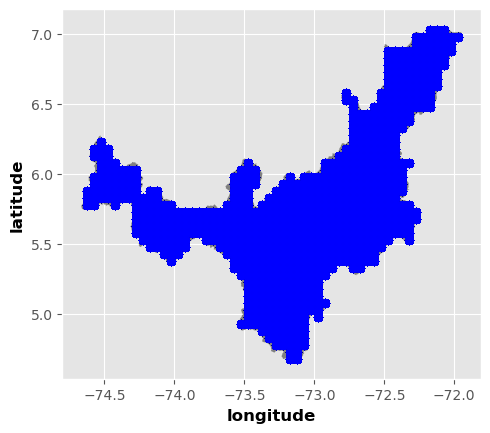

In [20]:
#show point and raster on a matplotlib plot
#fig, axis = plt.subplots(figsize=(12,12))
fig, axis = plt.subplots()
shp.plot(ax = axis, color='gray')
data_filtered.plot(ax = axis, color='blue')
plt.subplot().set_xlabel('longitude',fontweight = 'bold', color = 'black')
plt.subplot().set_ylabel('latitude',fontweight = 'bold', color = 'black')

In [27]:
df1 = pd.read_csv('dataset_filter.csv')
df1

,Unnamed: 0,time,latitude,longitude,precip,geometry
0,206,1981-01-01,4.674999,-73.175003,24.661077,POINT (-73.17500305175781 4.674999237060547)
1,207,1981-01-01,4.674999,-73.125008,22.154955,POINT (-73.12500762939453 4.674999237060547)
2,264,1981-01-01,4.724998,-73.175003,26.440027,POINT (-73.17500305175781 4.724998474121094)
3,265,1981-01-01,4.724998,-73.125008,24.290825,POINT (-73.12500762939453 4.724998474121094)
4,320,1981-01-01,4.774998,-73.275002,47.332767,POINT (-73.2750015258789 4.774997711181641)
...,...,...,...,...,...,...
387579,1662625,2023-08-01,6.974998,-72.025002,313.745540,POINT (-72.0250015258789 6.974998474121094)
387580,1662626,2023-08-01,6.974998,-71.975006,300.217000,POINT (-71.97500610351562 6.974998474121094)
387581,1662680,2023-08-01,7.024998,-72.175003,228.982600,POINT (-72.17500305175781 7.024997711181641)
387582,1662681,2023-08-01,7.024998,-72.125008,277.485300,POINT (-72.12500762939453 7.024997711181641)


In [28]:
df1= pd.DataFrame(df1.drop(columns='geometry'))
df1= pd.DataFrame(df1.drop(columns='Unnamed: 0'))
df1 = pd.DataFrame(df1)

In [29]:
df1

,time,latitude,longitude,precip
0,1981-01-01,4.674999,-73.175003,24.661077
1,1981-01-01,4.674999,-73.125008,22.154955
2,1981-01-01,4.724998,-73.175003,26.440027
3,1981-01-01,4.724998,-73.125008,24.290825
4,1981-01-01,4.774998,-73.275002,47.332767
...,...,...,...,...
387579,2023-08-01,6.974998,-72.025002,313.745540
387580,2023-08-01,6.974998,-71.975006,300.217000
387581,2023-08-01,7.024998,-72.175003,228.982600
387582,2023-08-01,7.024998,-72.125008,277.485300


In [33]:
#save file in csv format
df1.to_csv('dataset_filter_clean.csv')

In [34]:
file = df1.copy()

In [35]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387584 entries, 0 to 387583
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       387584 non-null  object 
 1   latitude   387584 non-null  float64
 2   longitude  387584 non-null  float64
 3   precip     387584 non-null  float64
dtypes: float64(3), object(1)
memory usage: 11.8+ MB


In [37]:
# how many pheographic points are there per month
periodo =file.copy()
periodo.drop(periodo[(periodo.time >"1981-01-01")].index, inplace=True)
periodo

,time,latitude,longitude,precip
0,1981-01-01,4.674999,-73.175003,24.661077
1,1981-01-01,4.674999,-73.125008,22.154955
2,1981-01-01,4.724998,-73.175003,26.440027
3,1981-01-01,4.724998,-73.125008,24.290825
4,1981-01-01,4.774998,-73.275002,47.332767
...,...,...,...,...
752,1981-01-01,6.974998,-72.025002,58.585667
753,1981-01-01,6.974998,-71.975006,56.842644
754,1981-01-01,7.024998,-72.175003,35.173233
755,1981-01-01,7.024998,-72.125008,35.749523


In [38]:
## pasar la columna "time" a formato datetime
file['datetime'] = pd.to_datetime(
    df['time'],
    format = '%Y.%m.%d'
)

## fijar el indice la variable datetime
file = file.set_index('time')

## organizar cronologicamente de forma ascendente
file.sort_index(inplace=True)

## finalmente eliminar colimna "time" y "index"
file = file.drop(columns=['datetime'])
#data_filter = data_filter.drop(columns=['index'])
file

,latitude,longitude,precip
time,,,
1981-01-01,4.674999,-73.175003,24.661077
1981-01-01,4.674999,-73.125008,22.154955
1981-01-01,4.724998,-73.175003,26.440027
1981-01-01,4.724998,-73.125008,24.290825
1981-01-01,4.774998,-73.275002,47.332767
...,...,...,...
2023-08-01,6.974998,-72.025002,313.745540
2023-08-01,6.974998,-71.975006,300.217000
2023-08-01,7.024998,-72.175003,228.982600
